https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

Derived Variables - 
* AON (convert days to months)





Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import os

#### Read the data to Dataframe

In [4]:
df = pd.read_csv('telecom_churn_data.csv')

In [6]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['churn'],axis=1)

# Putting response variable to y
y = df['churn']

y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [7]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [11]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [12]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [13]:
pca.components_

array([[-9.99999130e-01, -3.58711588e-05, -1.77881174e-04, ...,
         2.81167950e-08,  6.41381696e-09,  2.75001271e-06],
       [-4.77767171e-04,  3.47998729e-02,  4.66273919e-02, ...,
        -3.79404265e-06,  4.59295645e-05, -6.29849104e-05],
       [-6.77086134e-06,  1.41949819e-01,  1.69185562e-01, ...,
         1.79276828e-05, -8.14683098e-05, -6.01324182e-05],
       ...,
       [-0.00000000e+00,  8.52929927e-19,  8.87354441e-19, ...,
        -1.10342633e-01, -1.10342633e-01, -7.48896649e-18],
       [ 0.00000000e+00,  2.26661300e-19, -6.12305586e-19, ...,
         2.76577986e-01,  2.76577986e-01,  1.13026057e-17],
       [ 0.00000000e+00,  2.68614753e-15, -5.95390993e-15, ...,
        -8.81077103e-05, -8.81077102e-05, -3.79369152e-14]])

In [14]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.999999,-0.000478,Unnamed: 0
1,-0.000036,0.034800,arpu_6
2,-0.000178,0.046627,arpu_7
3,-0.000087,0.051208,arpu_8
4,-0.000059,0.041135,aug_vbc_3g


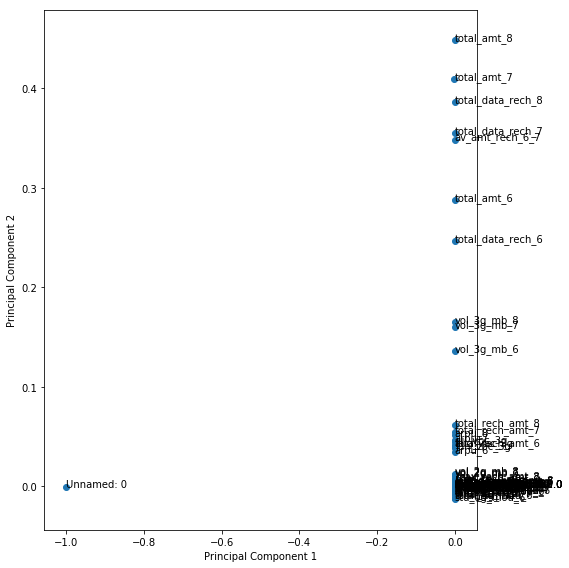

In [15]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [16]:
pca.explained_variance_ratio_

array([9.66501534e-01, 1.37442223e-02, 4.37353270e-03, 3.78188739e-03,
       2.35072356e-03, 1.73504059e-03, 1.50637946e-03, 9.53392136e-04,
       9.01195887e-04, 7.11052288e-04, 4.72342314e-04, 3.30309689e-04,
       3.08112134e-04, 2.72409093e-04, 2.32143668e-04, 2.00788580e-04,
       1.77010156e-04, 1.46009819e-04, 1.31780070e-04, 1.10787696e-04,
       1.04768625e-04, 9.27856478e-05, 7.13208585e-05, 6.65929250e-05,
       6.44263337e-05, 6.18115514e-05, 5.95671207e-05, 5.15534218e-05,
       5.13966786e-05, 4.10187364e-05, 3.77271012e-05, 3.56580158e-05,
       3.25951300e-05, 2.77483636e-05, 2.61716831e-05, 2.37643622e-05,
       1.90017445e-05, 1.67745535e-05, 1.49411512e-05, 1.32507889e-05,
       1.21437407e-05, 1.15140471e-05, 1.05037002e-05, 1.03827836e-05,
       9.87137079e-06, 9.72507281e-06, 9.65326084e-06, 8.30112172e-06,
       7.10801918e-06, 7.02464066e-06, 6.47978553e-06, 5.98712921e-06,
       5.86368387e-06, 5.23464263e-06, 4.03176188e-06, 2.95607822e-06,
      

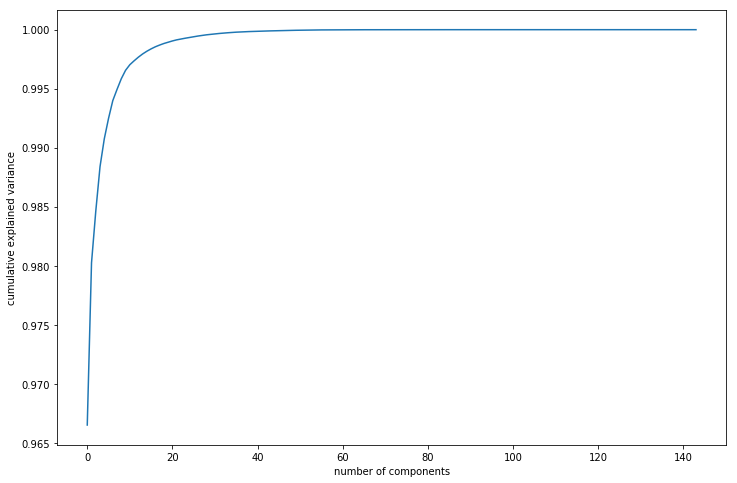

In [17]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [39]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
 
pca_final = IncrementalPCA(n_components=10)

In [40]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 10)

In [41]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

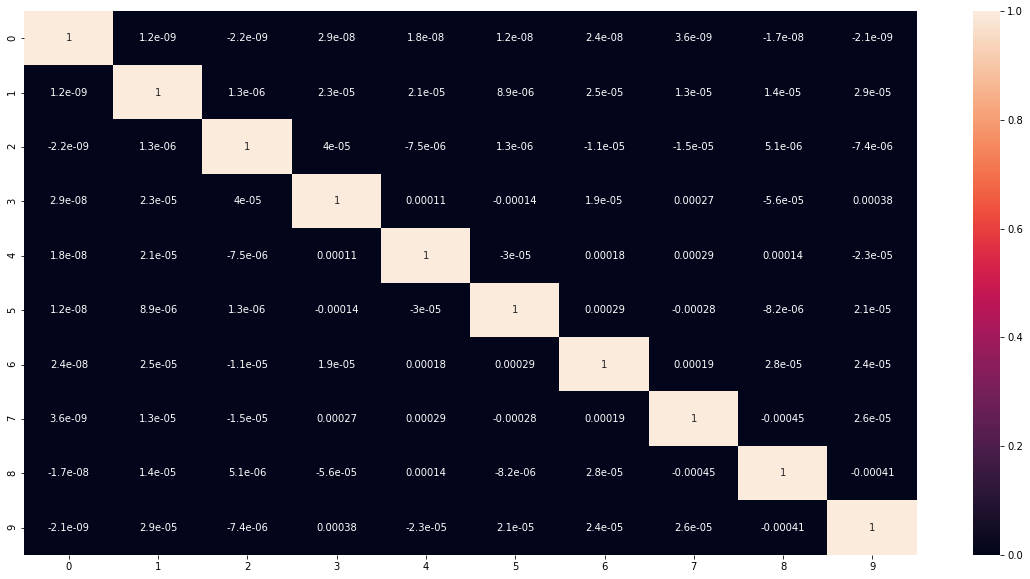

In [42]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [43]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0003831337900867699 , min corr:  -0.0004529454477569629


In [44]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 10)

In [45]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

C:\Users\z001k1pz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.85'

In [47]:
pca_again = PCA(0.995)

In [48]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 14 components

(21000, 9)

In [49]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

C:\Users\z001k1pz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(9001, 9)

In [51]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.85'

In [53]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [57]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(X_train_res,y_train_res)

C:\Users\z001k1pz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z001k1pz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(9001, 9)

In [62]:
X_train_res.shape

(38618, 144)

In [64]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pre = model_pca2.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pre)

In [65]:
print(cnf_matrix)

[[6971 1280]
 [ 141  609]]


In [67]:
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pre)

In [68]:
print(test_accuracy)

0.8421286523719587
